In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [20]:
y.shape, tx.shape

((10000,), (10000, 2))

In [37]:
y[0:20]

array([109.81967768,  73.68895452,  96.58434842,  99.89928152,
        93.68280948,  69.10431871,  83.50326143,  76.25888416,
        79.87196594,  71.00545308,  84.7186362 ,  97.03849095,
        75.87586733,  86.00856635,  84.64111228,  78.17286625,
        88.99694187,  78.48909547,  84.43671674,  82.8216982 ])

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [38]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    
    N=tx.shape[0]
    e=y-tx.dot(w)
    L=np.mean(e*e)/2
    
    return L

compute_loss(y,tx,np.array([1, 2]))

2694.4833658870843

# 2 Grid Search

Fill in the function `grid_search()` below:

In [46]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(0,len(w0)):
        for j in range(0,len(w1)):
            losses[i,j]=compute_loss(y,tx,np.array([w0[i],w1[j]]))
      
    return losses


Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.009 seconds


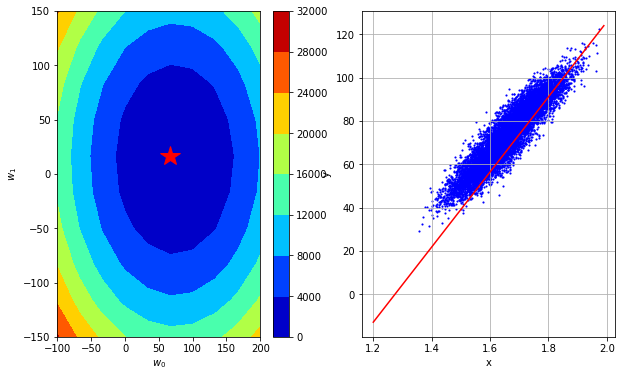

In [50]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [78]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    
    
    return -(np.transpose(tx).dot(y-tx.dot(w)))/tx.shape[0]
    
    
compute_gradient(y,tx,np.array([1, 2]))

array([-72.293922  , -11.47971243])

Please fill in the functions `gradient_descent` below:

In [63]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        nabla_w=compute_gradient(y,tx,w)
        loss=compute_loss(y,tx,w)
    
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w=w-gamma*nabla_w
            # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [76]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=51.305745401473644, w1=9.435798704492269
Gradient Descent(1/49): loss=265.3024621089598, w0=66.69746902191571, w1=12.266538315840005
Gradient Descent(2/49): loss=37.87837955044126, w0=71.31498610804834, w1=13.115760199244333
Gradient Descent(3/49): loss=17.410212120174467, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450455, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638305, w0=73.29348920882515, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412117, w1=13.

In [77]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [106]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    
    return -(np.transpose(tx).dot(y-tx.dot(w)))/tx.shape[0]


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        nabla_w=0
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            nabla_w+=compute_stoch_gradient(minibatch_y,minibatch_tx,w)
            
            
        w=w-gamma*nabla_w/batch_size
        loss=compute_loss(y,tx,w)
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
            bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    return losses, ws

In [108]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 5

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2016.4371667997032, w0=10.751611584775839, w1=3.9633073614244942
Gradient Descent(1/49): loss=1434.8028583802914, w0=20.331690320055827, w1=7.662844181379457
Gradient Descent(2/49): loss=1108.87247430983, w0=27.21659982329117, w1=5.488870569967803
Gradient Descent(3/49): loss=818.2561161035272, w0=33.72480682003267, w1=7.153135147286471
Gradient Descent(4/49): loss=619.8271721658945, w0=39.22160616194831, w1=6.55440652963546
Gradient Descent(5/49): loss=486.34130512614587, w0=43.30222827055593, w1=6.9674822772333975
Gradient Descent(6/49): loss=357.7368677796033, w0=47.54767605137087, w1=8.807156467871614
Gradient Descent(7/49): loss=252.44868068673583, w0=51.523846535501576, w1=13.044511545518038
Gradient Descent(8/49): loss=184.12693230044232, w0=54.949420107686024, w1=12.499233414878205
Gradient Descent(9/49): loss=140.78182836413185, w0=57.762120162556094, w1=10.388594092449512
Gradient Descent(10/49): loss=105.84128386390329, w0=59.92979464459815, w1=1

In [109]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)